In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split   #For K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
svc = SVC()

In [6]:
df = pd.read_csv('Border_Regions.csv')

In [7]:
#Viewing all rows; 
df.head(16)

#nsight:#Based on the output, New Mexico Border Region has the highest "Mean length of stay, days=5.03", While California Non-Border Region had the least "Mean length of stay, days".
#Texas Border region had the lowest Mean cost per stay=$19488.46604, while California Border Region had the highest Mean cost per stay=31180.62332
#New Mexico Border Region had the highest Rate of discharges per 100,000 population=117.776376, While california Border Region had the lowest Rate of discharges per 100,000 population=69.333685

,Unnamed: 0,Total number of discharges,"Rate of discharges per 100,000 population","Age/sex adjusted rate of discharges per 100,000 population","Mean length of stay, days",Aggregate number of days in the hospital,"Number of inpatient days per 100,000 population","Age/sex adjusted number of inpatient days per 100,000 population","Mean cost per stay, $","Aggregate costs for all hospital stays, $","Costs for inpatient stays per capita, $","Age/sex adjusted costs for inpatient stays per capita, $"
0,US Total,373814.9291,114.970710,114.970710,4.524200,1.691214e+06,520.150500,520.150500,23486.15467,8.779475e+09,27.002199,27.002199
1,Total for All Four Border States,68333.0000,88.838305,87.593836,4.417629,3.018698e+05,392.454663,383.785789,26452.82654,1.807601e+09,23.500243,22.894279
2,Arizona Total,5639.0000,86.573679,75.032602,4.482517,2.703964e+04,388.067986,330.010506,25394.86421,1.531880e+08,21.985268,18.705482
3,California Total,32696.0000,82.727365,80.517477,4.005296,1.315158e+05,331.347595,320.704169,29781.35299,9.778850e+08,24.637329,23.721724
4,New Mexico Total,1760.0000,85.858810,75.014326,4.546116,8.146290e+03,390.324083,332.868395,23309.46073,4.176876e+07,20.013226,17.053768
5,Texas Total,28238.0000,105.047767,110.199025,4.856187,1.437162e+05,510.131553,531.137647,22977.05334,6.799936e+08,24.136881,25.039538
6,Border Region Total for All Four Border States,7413.0000,92.065387,92.332697,4.690274,3.476900e+04,431.811876,429.431963,24595.09513,1.823234e+08,22.643569,22.452097
7,Arizona Border Region,1252.0000,90.047714,74.961396,4.662141,5.837000e+03,419.815100,342.624291,24651.58359,3.086378e+07,22.198187,18.145457
8,California Border Region,2437.0000,69.333685,68.973674,4.260156,1.038200e+04,295.372311,293.190796,31180.62332,7.598718e+07,21.618675,21.378930
9,New Mexico Border Region,426.0000,122.977795,105.504872,5.035211,2.145000e+03,619.219178,512.681639,26289.94718,1.119952e+07,32.330797,26.671282


In [8]:
###dropping the top two rows
df = df.drop([0, 1])

In [9]:
df.shape

(14, 12)

In [10]:
df.describe()

#Insight: The average Rate of discharges per 100,000 population= 92.619577, and the maximum Rate of discharges per 100,000 population =122.977795
#the average cost per stay= $25330.875701, while the maximum cost per stay= 31180.623320 
#The average length of stay in days= 4.529865, while the maximum length of stay in days = 5.035211


#Insight for dataset distribution: Noticeably, the mean values for some of the colums are less than the median values. 
#This means that the distribution for those columns are negatively skewed, because most of the values lie at the lower tail of the distribution.

,Total number of discharges,"Rate of discharges per 100,000 population","Age/sex adjusted rate of discharges per 100,000 population","Mean length of stay, days",Aggregate number of days in the hospital,"Number of inpatient days per 100,000 population","Age/sex adjusted number of inpatient days per 100,000 population","Mean cost per stay, $","Aggregate costs for all hospital stays, $","Costs for inpatient stays per capita, $","Age/sex adjusted costs for inpatient stays per capita, $"
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000
mean,14642.785714,91.293158,87.623243,4.538286,65296.975095,418.121201,396.645006,25382.502143,3.905741e+08,22.942680,21.586499
std,18066.016291,15.176033,20.116675,0.329337,79259.306579,98.015318,117.225658,3211.795456,4.927961e+08,3.407611,3.800234
min,426.000000,69.333685,67.200964,3.989865,2145.000000,295.372311,284.985042,19488.466040,1.119952e+07,17.040848,14.591456
25%,1929.250000,82.956309,74.974628,4.354172,8705.217501,337.839165,321.086425,23334.959152,4.739481e+07,21.710324,18.285463
50%,5013.000000,87.517337,80.874710,4.514316,23285.319065,389.196034,337.746343,25023.223900,1.328411e+08,22.798189,22.698322
75%,27413.500000,96.738869,99.540963,4.812670,120966.460875,465.762908,475.485776,26581.649083,6.559656e+08,24.002762,23.834617
max,60920.000000,122.977795,137.829240,5.035211,267100.835600,619.219178,682.644694,31180.623320,1.625278e+09,32.330797,26.682367


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 2 to 15
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Unnamed: 0                                                        14 non-null     object 
 1   Total number of discharges                                        14 non-null     float64
 2   Rate of discharges per 100,000 population                         14 non-null     float64
 3   Age/sex adjusted rate of discharges per 100,000 population        14 non-null     float64
 4   Mean length of stay, days                                         14 non-null     float64
 5   Aggregate number of days in the hospital                          14 non-null     float64
 6   Number of inpatient days per 100,000 population                   14 non-null     float64
 7   Age/sex adjusted number of inpatient 

In [12]:
#Viewing missing values in the dataset: this dataset has no null value for all columns
df.isnull().sum()

Unnamed: 0                                                          0
Total number of discharges                                          0
Rate of discharges per 100,000 population                           0
Age/sex adjusted rate of discharges per 100,000 population          0
Mean length of stay, days                                           0
Aggregate number of days in the hospital                            0
Number of inpatient days per 100,000 population                     0
Age/sex adjusted number of inpatient days per 100,000 population    0
Mean cost per stay, $                                               0
Aggregate costs for all hospital stays, $                           0
Costs for inpatient stays per capita, $                             0
Age/sex adjusted costs for inpatient stays per capita, $            0
dtype: int64

<AxesSubplot:>

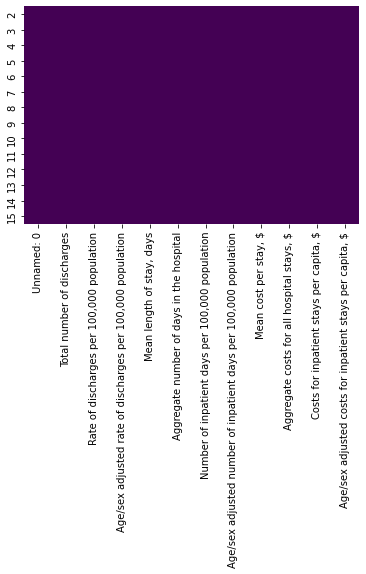

In [13]:
#Using heatmap too view the amount of data that is missing from the attributes
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [14]:
df.rename(columns = {'Unnamed: 0':'States', 'Total number of discharges':'Total_Discharges', 'Rate of discharges per 100,000 population':'Discharge Rate_Per_100K', 'Age/sex adjusted rate of discharges per 100,000 population': 'Discharge_Rate_Age_Sex_Per_100K', 
                        'Mean length of stay, days':'Mean_Length_Stay_Days', 'Aggregate number of days in the hospital':'Aggregate_Days_In_Hospital', 'Number of inpatient days per 100,000 population':'Inpatient_Days_Per_100K_Population', 'Age/sex adjusted number of inpatient days per 100,000 population':'Age_Sex_Adjusted_Inpatient_Days_Per_100K', 
                        'Mean cost per stay, $':'Mean_Cost_Per_Stay', 'Aggregate costs for all hospital stays, $':'Aggregate_Costs_All_Hospital_Stays', 'Costs for inpatient stays per capita, $':'Inpatient_Cost_Per_Capita', 'Age/sex adjusted costs for inpatient stays per capita, $':'Age_Sex_Adjusted_Costs_Inpatient_Per_Capita'}, inplace = True)

In [81]:
df.head(20)

,States,Total_Discharges,Discharge Rate_Per_100K,Discharge_Rate_Age_Sex_Per_100K,Mean_Length_Stay_Days,Aggregate_Days_In_Hospital,Inpatient_Days_Per_100K_Population,Age_Sex_Adjusted_Inpatient_Days_Per_100K,Mean_Cost_Per_Stay,Aggregate_Costs_All_Hospital_Stays,Inpatient_Cost_Per_Capita,Age_Sex_Adjusted_Costs_Inpatient_Per_Capita
2,2,5639.0,86.573679,75.032602,4.482517,27039.638130,388.067986,330.010506,25394.86421,1.531880e+08,21.985268,18.705482
3,6,32696.0,82.727365,80.517477,4.005296,131515.816600,331.347595,320.704169,29781.35299,9.778850e+08,24.637329,23.721724
4,9,1760.0,85.858810,75.014326,4.546116,8146.290002,390.324083,332.868395,23309.46073,4.176876e+07,20.013226,17.053768
5,13,28238.0,105.047767,110.199025,4.856187,143716.235500,510.131553,531.137647,22977.05334,6.799936e+08,24.136881,25.039538
6,3,7413.0,92.065387,92.332697,4.690274,34769.000000,431.811876,429.431963,24595.09513,1.823234e+08,22.643569,22.452097
7,0,1252.0,90.047714,74.961396,4.662141,5837.000000,419.815100,342.624291,24651.58359,3.086378e+07,22.198187,18.145457
8,4,2437.0,69.333685,68.973674,4.260156,10382.000000,295.372311,293.190796,31180.62332,7.598718e+07,21.618675,21.378930
9,7,426.0,122.977795,105.504872,5.035211,2145.000000,619.219178,512.681639,26289.94718,1.119952e+07,32.330797,26.671282
10,11,3298.0,117.776376,137.829240,4.974227,16405.000000,585.846408,682.644694,19488.46604,6.427296e+07,22.952809,26.682367
11,10,60920.0,88.460994,87.045809,4.384452,267100.835600,387.853010,378.532462,26678.88305,1.625278e+09,23.600405,22.944547


<AxesSubplot:>

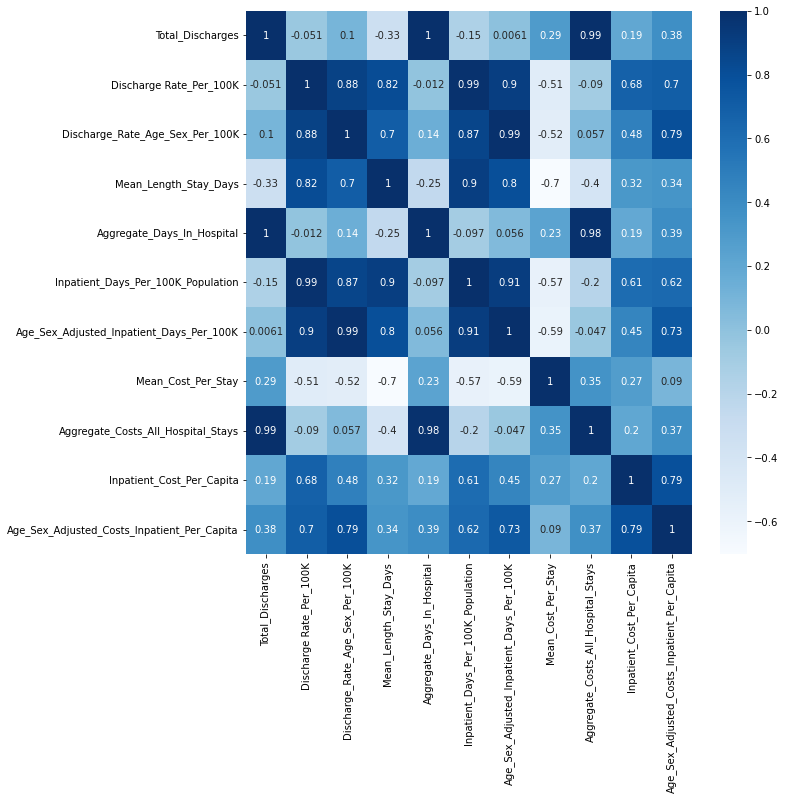

In [16]:
#viewing the correlation between different features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [17]:
#Insight: #Dark shades represents positive correlation while lighter shades represents negative correlation.  
#Stronger correlation pops out in darker, weaker correlation in lighter shades.

#Positive Correlation: Age_Sex_Adjusted_Costs_Inpatient_Per_Capita,Inpatient_Cost_Per_Capita, Age_Sex_Adjusted_Inpatient_Days_Per 100K, Inpatient_Days_Per_100K_Population, Discharge_Rate_Age_Sex_Per_100K, Discharge Rate_Per_100K
#Negative Correlation:States, Total_Discharges, Mean_Length_Stay_Days, Mean_Cost_Per_Stay, Aggregate_Costs_All Hospital_Stays, Aggregate_Days_In_Hospital

In [18]:
#Insight: The average Rate of discharges per 100,000 population= 92.619577, and the maximum Rate of discharges per 100,000 population =122.977795
#the average cost per stay= $25330.875701, while the maximum cost per stay= 31180.623320 
#The average length of stay in days= 4.529865, while the maximum length of stay in days = 5.035211

#nsight:#Based on the output, New Mexico Border Region has the highest "Mean length of stay, days=5.03", While California Non-Border Region had the least "Mean length of stay, days".
#Texas Border region had the lowest Mean cost per stay=$19488.46604, while California Border Region had the highest Mean cost per stay=31180.62332
#New Mexico Border Region had the highest Rate of discharges per 100,000 population=117.776376, While california Border Region had the lowest Rate of discharges per 100,000 population=69.333685


#How does the "Age And Sex Adjusted Number Of Inpatient Days_Per 100000 Population" vary with each State?

#– How does the "Costs For Inpatient Stays_Per Capita" vary with the "Total Number_Discharges""?

#– Based on insight, New Mexico Border Region had the highest "Mean length of stay" and the highest "Rate of discharges per 100,000 population"?

#– How does "Age And Sex Adjusted Number Of Inpatient Days_Per 100000 Population" vary with the "Discharge Rate Per 100000 Population_Age And Sex"?

In [19]:
#Finding the unique value of the catgorical feature "States"
df['States'].value_counts()

Arizona Total                                         1
California Total                                      1
New Mexico Total                                      1
Texas Total                                           1
Border Region Total for All Four Border States        1
Arizona Border Region                                 1
California Border Region                              1
New Mexico Border Region                              1
Texas Border Region                                   1
Non-Border Region Total for All Four Border States    1
Arizona Non-Border Region                             1
California Non-Border Region                          1
New Mexico Non-Border Region                          1
Texas Non-Border Region                               1
Name: States, dtype: int64

In [20]:
#Coverting the data type from object to category
df['States'] = df['States'].astype('category').cat.codes

In [21]:
from sklearn.preprocessing import LabelEncoder
df['States'].head()

2     2
3     6
4     9
5    13
6     3
Name: States, dtype: int8

In [22]:
le = LabelEncoder()
df['States'] = le.fit_transform(df['States'])

In [23]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int8)

In [24]:
df.head()

,States,Total_Discharges,Discharge Rate_Per_100K,Discharge_Rate_Age_Sex_Per_100K,Mean_Length_Stay_Days,Aggregate_Days_In_Hospital,Inpatient_Days_Per_100K_Population,Age_Sex_Adjusted_Inpatient_Days_Per_100K,Mean_Cost_Per_Stay,Aggregate_Costs_All_Hospital_Stays,Inpatient_Cost_Per_Capita,Age_Sex_Adjusted_Costs_Inpatient_Per_Capita
2,2,5639.0,86.573679,75.032602,4.482517,27039.638130,388.067986,330.010506,25394.86421,153188029.1,21.985268,18.705482
3,6,32696.0,82.727365,80.517477,4.005296,131515.816600,331.347595,320.704169,29781.35299,977884985.7,24.637329,23.721724
4,9,1760.0,85.858810,75.014326,4.546116,8146.290002,390.324083,332.868395,23309.46073,41768762.6,20.013226,17.053768
5,13,28238.0,105.047767,110.199025,4.856187,143716.235500,510.131553,531.137647,22977.05334,679993564.1,24.136881,25.039538
6,3,7413.0,92.065387,92.332697,4.690274,34769.000000,431.811876,429.431963,24595.09513,182323440.2,22.643569,22.452097


In [25]:
le.inverse_transform(df['States'])

array([ 2,  6,  9, 13,  3,  0,  4,  7, 11, 10,  1,  5,  8, 12], dtype=int8)

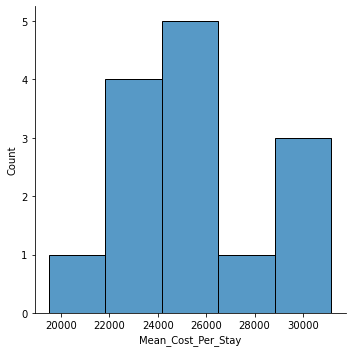

<AxesSubplot:xlabel='Mean_Cost_Per_Stay', ylabel='Count'>

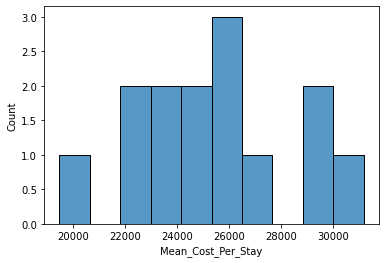

In [26]:
#ask questions related to independent variables and the target variable. 
#For example – how does the "Age And Sex Adjusted Costs For Inpatient Stays_Per Capita" affects the "Costs For Inpatient Stays_Per Capita"?

#making a histogram of 'Mean_Cost_Per_Stay' column: From the above graph, you can say that the graph deviates from the normal and is negatively skewed.  
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df['Mean_Cost_Per_Stay'])
plt.show()



#Viewing the univariate analysis of Mean_Cost_Per_Stay. The histograms below shows the distribution and frequency of the "Mean_Cost_Per_Stay". 
#As you can see, the cost per stay ranges from $20000 to $30000. The data is not evenly distibuted due to left skeweness. Based on insight, 
#more people spent below the Mean_Cost_Per_Stay.
sns.histplot(df.Mean_Cost_Per_Stay,bins=10)

In [27]:
#finding the Skewness and Kurtosis of the above graph 
print("skewness:%f" %df['Mean_Cost_Per_Stay'].skew())
print("skewness:%f" %df['Mean_Cost_Per_Stay'].kurt())

skewness:0.263271
skewness:-0.121611


Text(0, 0.5, 'Inpatient_Cost_Per Capita')

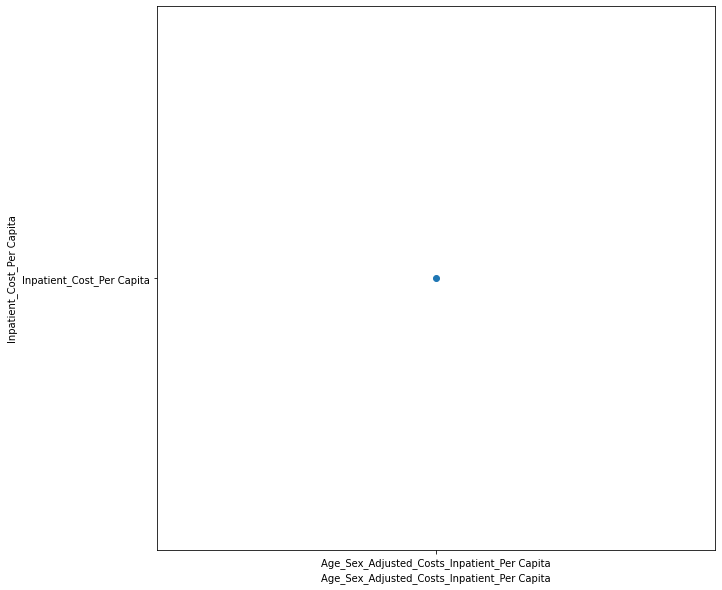

In [51]:
#How does the Age_Sex_Adjusted_Costs_Inpatient_Per Capita affect the Inpatient_Cost_Per Capita: 
#We can see that most of the Age_Sex_Adjusted_Costs_Inpatient_Per Capita value lies between 14.5-26.5, with highest cost of $32.5.  
#There are outliers also(between 23-25, after 26) and the trend is inconsistent

plt.figure(figsize=(10,10))
plt.scatter(x='Age_Sex_Adjusted_Costs_Inpatient_Per Capita',y='Inpatient_Cost_Per Capita',data=df)
plt.xlabel('Age_Sex_Adjusted_Costs_Inpatient_Per Capita')
plt.ylabel('Inpatient_Cost_Per Capita')

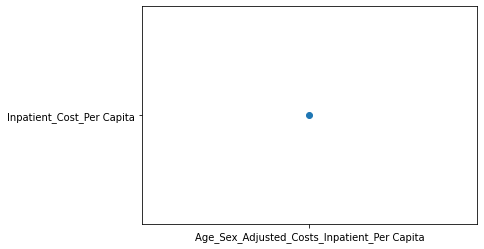

In [80]:
#Positive Correlation: Age_Sex_Adjusted_Costs_Inpatient_Per Capita, Inpatient_Cost_Per Capita, Age_Sex_Adjusted_Inpatient_Days_Per 100K, Inpatient_Days_Per_100K_Population, Discharge_Rate_Age_Sex_Per_100K, Discharge Rate_Per 10K Population
#Negative Correlation:States, Total_Discharges, Mean_Length_Stay_Days, Mean_Cost_Per_Stay, Aggregate_Costs_All Hospital_Stays, Aggregate_Days_In_Hospital

#Insight: Observe the positive correlation from these variables. "Inpatient_Cost_Per Capita increases" as the "Age_Sex_Adjusted_Costs_Inpatient_Per Capita"
#The plot below is indicating a positive correlation between the two variables. As the Age_Sex_Adjusted_Costs_Inpatient_Per Capita increases, Inpatient_Cost_Per Capita also increases.

plt.scatter(x='Age_Sex_Adjusted_Costs_Inpatient_Per Capita', y='Inpatient_Cost_Per Capita', data=df) 
plt.show()

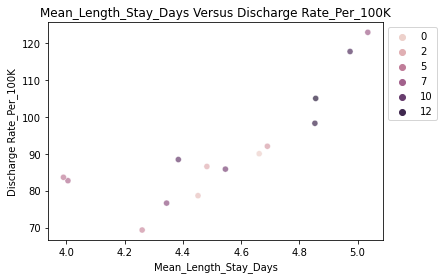

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


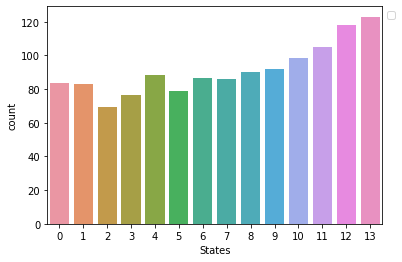

Text(0, 0.5, 'Discharge Rate_Per_100K')

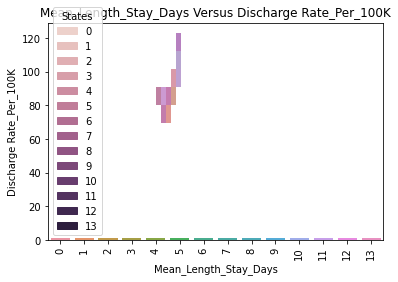

In [130]:
#– Based on insight, New Mexico Border Region had the highest "Mean length of stay" and the highest "Discharge Rate_Per_100K"

#visualization based on scatter plot
sns.scatterplot( x='Mean_Length_Stay_Days', y='Discharge Rate_Per_100K', alpha = .7, hue='States', data=df,)
plt.title('Mean_Length_Stay_Days Versus Discharge Rate_Per_100K')
plt.legend(['abc'],loc='upper right')


# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


#Plots used are: bar plot and count plot
sns.barplot(x='Mean_Length_Stay_Days', y='Discharge Rate_Per_100K', data=df)
sns.countplot(x='States', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()
plt.xticks(rotation=90)
        

sns.histplot(x='Mean_Length_Stay_Days', y='Discharge Rate_Per_100K', alpha = .7, hue='States', data=df)
sns.countplot(x='States', data=df)

   
        
import matplotlib
import matplotlib.pyplot as plt
plt.title('Mean_Length_Stay_Days Versus Discharge Rate_Per_100K')
plt.xlabel('Mean_Length_Stay_Days')
plt.ylabel('Discharge Rate_Per_100K')

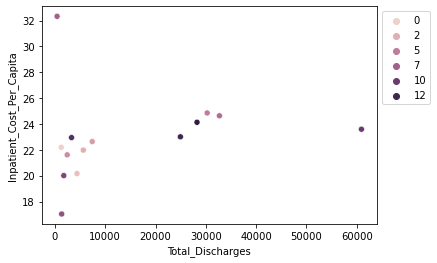

Text(0, 0.5, 'Inpatient_Cost_Per_Capita')

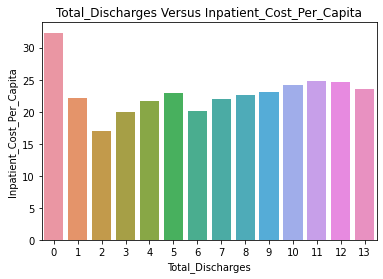

In [56]:
#How does the "Costs For Inpatient Stays_Per Capita" vary with the "Total Number_Discharges"?

#visualization based on scatter plot
sns.scatterplot( x="Total_Discharges", y='Inpatient_Cost_Per_Capita', data=df, hue='States')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

#Plots used are: bar plot and count plot
sns.barplot(x='Total_Discharges', y='Inpatient_Cost_Per_Capita', data=df)
sns.countplot(x='States', data=df)

plt.title('Total_Discharges Versus Inpatient_Cost_Per_Capita')
plt.xlabel('Total_Discharges')
plt.ylabel('Inpatient_Cost_Per_Capita')

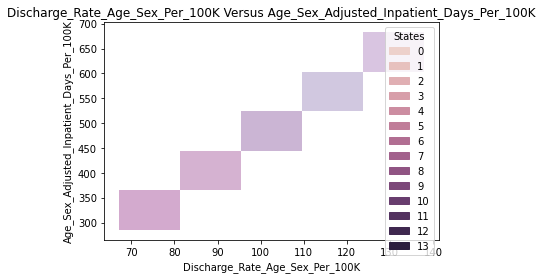

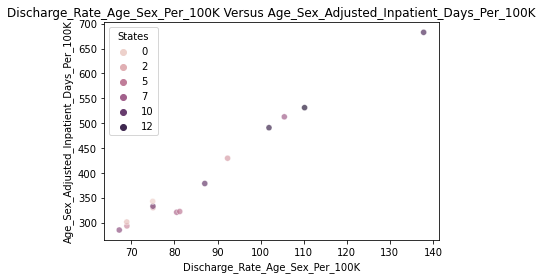

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Age_Sex_Adjusted_Inpatient_Days_Per_100K')

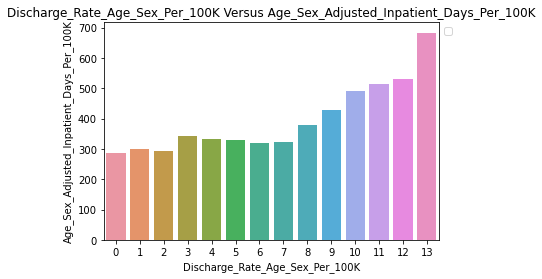

In [131]:
#– How does "Age And Sex Adjusted Number Of Inpatient Days_Per 100000 Population" vary with the "Discharge Rate Per 100000 Population_Age And Sex"?

sns.histplot(x="Discharge_Rate_Age_Sex_Per_100K", y='Age_Sex_Adjusted_Inpatient_Days_Per_100K', alpha = .7, hue='States', data=df)
plt.title('Discharge_Rate_Age_Sex_Per_100K Versus Age_Sex_Adjusted_Inpatient_Days_Per_100K')
plt.show()

#visualization based on scatter plot
sns.scatterplot( x='Discharge_Rate_Age_Sex_Per_100K', y='Age_Sex_Adjusted_Inpatient_Days_Per_100K', alpha = .7, hue='States', data=df,)
plt.title('Discharge_Rate_Age_Sex_Per_100K Versus Age_Sex_Adjusted_Inpatient_Days_Per_100K')
plt.show()
        
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
        
#Plots used are: bar plot and count plot
       
plt.title('Discharge_Rate_Age_Sex_Per_100K Versus Age_Sex_Adjusted_Inpatient_Days_Per_100K')
sns.barplot(x='Discharge_Rate_Age_Sex_Per_100K', y='Age_Sex_Adjusted_Inpatient_Days_Per_100K', data=df)
sns.countplot(x='States', data=df)

plt.xlabel('Discharge_Rate_Age_Sex_Per_100K')
plt.ylabel('Age_Sex_Adjusted_Inpatient_Days_Per_100K')

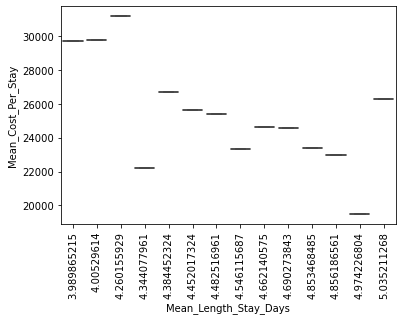

In [74]:
#Viewing the relationship between Mean_Length_Stay_Days and Mean_Cost_Per_Stay
sns.boxplot(x='Mean_Length_Stay_Days',y='Mean_Cost_Per_Stay', data=df)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'States')

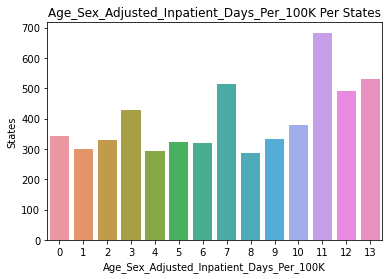

In [64]:
#How does the "Age And Sex Adjusted Number Of Inpatient Days_Per 100000 Population" vary with each State?


#Plots used are: bar plot and count plot
sns.barplot(x='States', y='Age_Sex_Adjusted_Inpatient_Days_Per_100K', data=df)
sns.countplot(x='States', data=df)

plt.title('Age_Sex_Adjusted_Inpatient_Days_Per_100K Per States')
plt.xlabel('Age_Sex_Adjusted_Inpatient_Days_Per_100K')
plt.ylabel('States')

<function matplotlib.pyplot.show(close=None, block=None)>

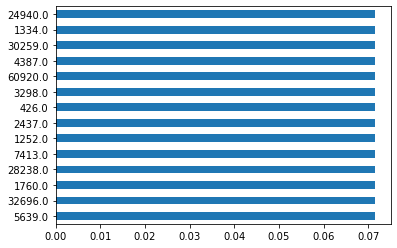

In [48]:
#calculating the percentage of Total_Discharge category
df.Total_Discharges.value_counts(normalize=True)


#Plotting bar graph of percentage of Total_Discharge category
df.Total_Discharges.value_counts(normalize=True).plot.barh()
plt.show

C:\Users\DOROTHY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


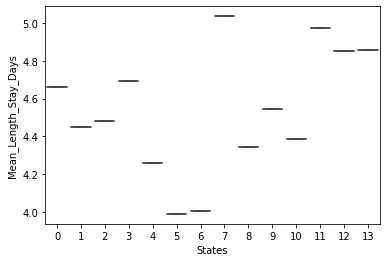

In [246]:
sns.boxplot(df.States, df.Mean_Length_Stay_Days)
plt.show()

<AxesSubplot:xlabel='States', ylabel='count'>

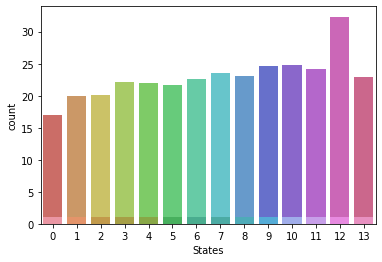

In [66]:
#Plots used are: bar plot and count plot
sns.barplot(x='Age_Sex_Adjusted_Costs_Inpatient_Per_Capita', y='Inpatient_Cost_Per_Capita', palette="hls", data=df)
sns.countplot(x='States', data=df)

In [132]:
#Using df.loc to display all data contained in "Texas Border Region"
df.loc[8]

States                                         4.000000e+00
Total_Discharges                               2.437000e+03
Discharge Rate_Per_100K                        6.933369e+01
Discharge_Rate_Age_Sex_Per_100K                6.897367e+01
Mean_Length_Stay_Days                          4.260156e+00
Aggregate_Days_In_Hospital                     1.038200e+04
Inpatient_Days_Per_100K_Population             2.953723e+02
Age_Sex_Adjusted_Inpatient_Days_Per_100K       2.931908e+02
Mean_Cost_Per_Stay                             3.118062e+04
Aggregate_Costs_All_Hospital_Stays             7.598718e+07
Inpatient_Cost_Per_Capita                      2.161868e+01
Age_Sex_Adjusted_Costs_Inpatient_Per_Capita    2.137893e+01
Name: 8, dtype: float64

In [133]:
#Extracting Texas Border Region column for visualizualization.
df.loc[8, ['Mean_Length_Stay_Days', 'Mean_Cost_Per_Stay', 'Total_Discharges']]

Mean_Length_Stay_Days        4.260156
Mean_Cost_Per_Stay       31180.623320
Total_Discharges          2437.000000
Name: 8, dtype: float64

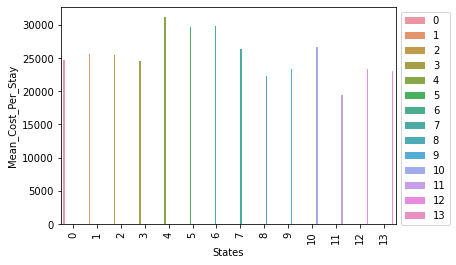

In [135]:
import plotly.express as px
import seaborn as sb

plt.xticks(rotation=90)
sb.barplot(x="States", y="Mean_Cost_Per_Stay", hue="States", data=df)

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [140]:
x1=TexasBorderRegion
x2=TexasNonBorderRegion
x3=NewMexicoBorderRegion
x4=NewMexicoNonBorderRegion

In [154]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [176]:
#Splitting data into training and testing sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [177]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [178]:
#Training with random forest algorithm to solve this regression problem
#Using the Exploratory Data Analysis, to build and fit with a regression Model  

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [179]:
#Evaluating the Algorithm: For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error
# With 20 trees, the root mean squared error is 0.18289

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1789562485966704
Mean Squared Error: 0.033452109999084954
Root Mean Squared Error: 0.1828991798753755


In [213]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [211]:
#Using Random Forest for Classification

from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=200, random_state=5)

In [215]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier()



clf.fit(X_train, y_train)
y_pred = clf.predict(x_test)

ValueError: Unknown label type: 'continuous'

In [222]:
#We are interested in checking how Age_Sex_Adjusted_Inpatient_Days_Per_100K is affecting the Mean_Cost_Per_Stay

y = df.Mean_Cost_Per_Stay

X = part_df[["Age_Sex_Adjusted_Inpatient_Days_Per_100K"]]

In [221]:
#Setting target and regressor variables separate from dataframe

part_df = df[["Mean_Cost_Per_Stay", "Age_Sex_Adjusted_Inpatient_Days_Per_100K"]]
part_df

,Mean_Cost_Per_Stay,Age_Sex_Adjusted_Inpatient_Days_Per_100K
2,25394.86421,330.010506
3,29781.35299,320.704169
4,23309.46073,332.868395
5,22977.05334,531.137647
6,24595.09513,429.431963
7,24651.58359,342.624291
8,31180.62332,293.190796
9,26289.94718,512.681639
10,19488.46604,682.644694
11,26678.88305,378.532462


In [224]:
#Fitting simple Linear Regression Model
linr_model = LinearRegression().fit(X, y)

linr_model

LinearRegression()

In [226]:
#generating coefficient

linr_model.coef_

array([-16.22194325])

In [227]:
#generating Intercept
linr_model.intercept_

31816.854924833024

In [229]:
#Making Predictions based on the coefficient and intercept: The result below is an array of Mean_Cost_Per_Stay for the corresponding Age_Sex_Adjusted_Inpatient_Days_Per_100K values

linr_model.predict(part_df[["Age_Sex_Adjusted_Inpatient_Days_Per_100K"]])

array([26463.44322453, 26614.4100871 , 26417.08271623, 23200.77015554,
       24850.63399285, 26258.82311523, 27060.73047389, 23500.16246669,
       20743.03143548, 25676.3228144 , 26931.64521861, 26589.60634817,
       27193.84375447, 23854.52419682])

In [232]:
#variation explained: Here, the r2_score() is a function that gives the coefficient of determination value. 
#The actual and predicted values are set under the y_true and y_pred  arguments

from sklearn.metrics import r2_score

r2_score(

    y_true = part_df.Mean_Cost_Per_Stay, 

    y_pred = linr_model.predict(part_df[["Age_Sex_Adjusted_Inpatient_Days_Per_100K"]])

)

0.3505543459974838